In [1]:
import pandas as pd
import numpy as np

In [2]:
categorical = pd.read_csv('files_for_lab/categorical.csv')
numerical = pd.read_csv('files_for_lab/numerical.csv')
target = pd.read_csv('files_for_lab/target.csv')

In [3]:
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [4]:
categorical.dtypes

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [5]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['STATE', 'HOMEOWNR', 'GENDER', 'RFA_2R', 'RFA_2A', 'GEOCODE2', 'DOMAIN_A']

encoder = OneHotEncoder(drop='first').fit(categorical[categorical_columns])
encoded_categorical = encoder.transform(categorical[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))
categorical = pd.concat([categorical.drop(columns=categorical_columns), encoded_df], axis=1)


In [6]:
categorical

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,36,3,2,89,1,37,12,92,8,94,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,14,3,1,94,1,52,2,93,10,95,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,43,3,2,90,1,0,2,91,11,92,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,44,3,2,87,1,28,1,87,11,94,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,16,3,2,86,1,20,1,93,10,96,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,27,3,2,96,1,0,2,96,2,96,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
95408,24,3,1,96,1,50,1,96,3,96,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95409,30,3,3,95,1,38,1,96,3,95,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
95410,24,2,1,86,1,40,5,90,11,96,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
categorical.columns

Index(['CLUSTER', 'DATASRCE', 'DOMAIN_B', 'ODATEW_YR', 'ODATEW_MM', 'DOB_YR',
       'DOB_MM', 'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR', 'MAXRDATE_MM',
       'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR', 'FIRSTDATE_MM',
       'STATE_FL', 'STATE_GA', 'STATE_IL', 'STATE_IN', 'STATE_MI', 'STATE_MO',
       'STATE_NC', 'STATE_TX', 'STATE_WA', 'STATE_WI', 'STATE_other',
       'HOMEOWNR_U', 'GENDER_M', 'GENDER_other', 'RFA_2A_E', 'RFA_2A_F',
       'RFA_2A_G', 'GEOCODE2_B', 'GEOCODE2_C', 'GEOCODE2_D', 'DOMAIN_A_R',
       'DOMAIN_A_S', 'DOMAIN_A_T', 'DOMAIN_A_U'],
      dtype='object')

In [8]:
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [9]:
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


Concat 3 datasets

In [10]:
data = pd.concat([categorical, numerical, target], axis=1)
data

,CLUSTER,DATASRCE,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,...,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2,TARGET_B,TARGET_D
0,36,3,2,89,1,37,12,92,8,94,...,12.0,10.0,4,7.741935,95515,0,4,39,0,0.0
1,14,3,1,94,1,52,2,93,10,95,...,25.0,25.0,18,15.666667,148535,0,2,1,0,0.0
2,43,3,2,90,1,0,2,91,11,92,...,16.0,5.0,12,7.481481,15078,1,4,60,0,0.0
3,44,3,2,87,1,28,1,87,11,94,...,11.0,10.0,9,6.812500,172556,1,4,41,0,0.0
4,16,3,2,86,1,20,1,93,10,96,...,15.0,15.0,14,6.864865,7112,1,2,26,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,27,3,2,96,1,0,2,96,2,96,...,25.0,25.0,9,25.000000,184568,0,1,12,0,0.0
95408,24,3,1,96,1,50,1,96,3,96,...,20.0,20.0,9,20.000000,122706,1,1,2,0,0.0
95409,30,3,3,95,1,38,1,96,3,95,...,10.0,10.0,3,8.285714,189641,1,3,34,0,0.0
95410,24,2,1,86,1,40,5,90,11,96,...,21.0,18.0,4,12.146341,4693,1,4,11,1,18.0


In [11]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [12]:
X = data.drop('TARGET_B', axis=1)
y = data['TARGET_B']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'min_samples_split': [2, 4, 6], 
    'min_samples_leaf' : [1, 2, 3],
    'max_depth': [3, 5, 7]
}
rf = RandomForestClassifier(random_state=100)

grid_search = GridSearchCV(rf, param_grid, n_jobs=1, return_train_score=True, verbose = 20, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 1/5; 1/108] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.949, test=0.949) total time=   4.9s
[CV 2/5; 1/108] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 2/5; 1/108] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.949, test=0.949) total time=   4.6s
[CV 3/5; 1/108] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 3/5; 1/108] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.949, test=0.949) total time=   4.6s
[CV 4/5; 1/108] START max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50
[CV 4/5; 1/108] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=(train=0.949, test=0.949) total time=   5.

[CV 5/5; 7/108] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.949, test=0.949) total time=  17.7s
[CV 1/5; 8/108] START max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 1/5; 8/108] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.949, test=0.949) total time=  23.1s
[CV 2/5; 8/108] START max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 2/5; 8/108] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.949, test=0.949) total time=  20.7s
[CV 3/5; 8/108] START max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 3/5; 8/108] END max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200;, score=(train=0.949, test=0.949) total time=  20.5s
[CV 4/5; 8/108] START max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200
[CV 4/5; 8/108] END max_depth=3, min_samples_leaf=1,

[CV 5/5; 14/108] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.949, test=0.949) total time=  11.1s
[CV 1/5; 15/108] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 1/5; 15/108] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.949, test=0.949) total time=  19.0s
[CV 2/5; 15/108] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 2/5; 15/108] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.949, test=0.949) total time=  19.7s
[CV 3/5; 15/108] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 3/5; 15/108] END max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=150;, score=(train=0.949, test=0.949) total time=  19.9s
[CV 4/5; 15/108] START max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=150
[CV 4/5; 15/108] END max_depth=3, min_sample

[CV 5/5; 21/108] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=50;, score=(train=0.949, test=0.949) total time=   7.1s
[CV 1/5; 22/108] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100
[CV 1/5; 22/108] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=(train=0.949, test=0.949) total time=  13.1s
[CV 2/5; 22/108] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100
[CV 2/5; 22/108] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=(train=0.949, test=0.949) total time=  13.5s
[CV 3/5; 22/108] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100
[CV 3/5; 22/108] END max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100;, score=(train=0.949, test=0.949) total time=  14.6s
[CV 4/5; 22/108] START max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100
[CV 4/5; 22/108] END max_depth=3, min_samples

[CV 5/5; 28/108] END max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.949, test=0.949) total time=  20.4s
[CV 1/5; 29/108] START max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50
[CV 1/5; 29/108] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=(train=0.949, test=0.949) total time=   4.9s
[CV 2/5; 29/108] START max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50
[CV 2/5; 29/108] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=(train=0.949, test=0.949) total time=   5.8s
[CV 3/5; 29/108] START max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50
[CV 3/5; 29/108] END max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50;, score=(train=0.949, test=0.949) total time=   5.6s
[CV 4/5; 29/108] START max_depth=3, min_samples_leaf=3, min_samples_split=4, n_estimators=50
[CV 4/5; 29/108] END max_depth=3, min_samples_leaf=

[CV 5/5; 35/108] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=(train=0.949, test=0.949) total time=  13.3s
[CV 1/5; 36/108] START max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 1/5; 36/108] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.949, test=0.949) total time=  17.3s
[CV 2/5; 36/108] START max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 2/5; 36/108] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.949, test=0.949) total time=  17.4s
[CV 3/5; 36/108] START max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 3/5; 36/108] END max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200;, score=(train=0.949, test=0.949) total time=  17.9s
[CV 4/5; 36/108] START max_depth=3, min_samples_leaf=3, min_samples_split=6, n_estimators=200
[CV 4/5; 36/108] END max_depth=3, min_sample

[CV 5/5; 42/108] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.949, test=0.949) total time=  15.8s
[CV 1/5; 43/108] START max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 1/5; 43/108] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.949, test=0.949) total time=  22.1s
[CV 2/5; 43/108] START max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 2/5; 43/108] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.949, test=0.949) total time=  21.4s
[CV 3/5; 43/108] START max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 3/5; 43/108] END max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.949, test=0.949) total time=  21.4s
[CV 4/5; 43/108] START max_depth=5, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 4/5; 43/108] END max_depth=5, min_sample

[CV 5/5; 49/108] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.949, test=0.949) total time=   7.8s
[CV 1/5; 50/108] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 50/108] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.949, test=0.949) total time=  15.2s
[CV 2/5; 50/108] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 2/5; 50/108] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.949, test=0.949) total time=  15.1s
[CV 3/5; 50/108] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 3/5; 50/108] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.949, test=0.949) total time=  14.8s
[CV 4/5; 50/108] START max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 4/5; 50/108] END max_depth=5, min_samples

[CV 5/5; 56/108] END max_depth=5, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=(train=0.949, test=0.949) total time=  29.9s
[CV 1/5; 57/108] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50
[CV 1/5; 57/108] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50;, score=(train=0.949, test=0.949) total time=   8.0s
[CV 2/5; 57/108] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50
[CV 2/5; 57/108] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50;, score=(train=0.949, test=0.949) total time=   8.1s
[CV 3/5; 57/108] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50
[CV 3/5; 57/108] END max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50;, score=(train=0.949, test=0.949) total time=   7.3s
[CV 4/5; 57/108] START max_depth=5, min_samples_leaf=2, min_samples_split=6, n_estimators=50
[CV 4/5; 57/108] END max_depth=5, min_samples_leaf=

[CV 5/5; 63/108] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.949, test=0.949) total time=  22.3s
[CV 1/5; 64/108] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 1/5; 64/108] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.949, test=0.949) total time=  30.2s
[CV 2/5; 64/108] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 2/5; 64/108] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.949, test=0.949) total time=  29.8s
[CV 3/5; 64/108] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 3/5; 64/108] END max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200;, score=(train=0.949, test=0.949) total time=  30.2s
[CV 4/5; 64/108] START max_depth=5, min_samples_leaf=3, min_samples_split=2, n_estimators=200
[CV 4/5; 64/108] END max_depth=5, min_sample

[CV 5/5; 70/108] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.949, test=0.949) total time=  15.0s
[CV 1/5; 71/108] START max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=150
[CV 1/5; 71/108] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=(train=0.949, test=0.949) total time=  22.2s
[CV 2/5; 71/108] START max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=150
[CV 2/5; 71/108] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=(train=0.949, test=0.949) total time=  22.4s
[CV 3/5; 71/108] START max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=150
[CV 3/5; 71/108] END max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=150;, score=(train=0.949, test=0.949) total time=  20.7s
[CV 4/5; 71/108] START max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=150
[CV 4/5; 71/108] END max_depth=5, min_sample

[CV 5/5; 77/108] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=50;, score=(train=0.950, test=0.949) total time=  16.0s
[CV 1/5; 78/108] START max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 1/5; 78/108] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.950, test=0.949) total time=  32.0s
[CV 2/5; 78/108] START max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 2/5; 78/108] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.949, test=0.949) total time=  32.2s
[CV 3/5; 78/108] START max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 3/5; 78/108] END max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.950, test=0.949) total time=  36.2s
[CV 4/5; 78/108] START max_depth=7, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 4/5; 78/108] END max_depth=7, min_samples

[CV 5/5; 84/108] END max_depth=7, min_samples_leaf=1, min_samples_split=6, n_estimators=200;, score=(train=0.949, test=0.949) total time= 1.1min
[CV 1/5; 85/108] START max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 1/5; 85/108] END max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.949, test=0.949) total time=  16.8s
[CV 2/5; 85/108] START max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 2/5; 85/108] END max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.949, test=0.949) total time=  17.4s
[CV 3/5; 85/108] START max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 3/5; 85/108] END max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=(train=0.949, test=0.949) total time=  17.6s
[CV 4/5; 85/108] START max_depth=7, min_samples_leaf=2, min_samples_split=2, n_estimators=50
[CV 4/5; 85/108] END max_depth=7, min_samples_leaf=

[CV 5/5; 91/108] END max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=150;, score=(train=0.949, test=0.949) total time=  47.0s
[CV 1/5; 92/108] START max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 1/5; 92/108] END max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=(train=0.949, test=0.949) total time= 1.1min
[CV 2/5; 92/108] START max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 2/5; 92/108] END max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=(train=0.949, test=0.949) total time= 1.2min
[CV 3/5; 92/108] START max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 3/5; 92/108] END max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=200;, score=(train=0.949, test=0.949) total time= 1.1min
[CV 4/5; 92/108] START max_depth=7, min_samples_leaf=2, min_samples_split=4, n_estimators=200
[CV 4/5; 92/108] END max_depth=7, min_sample

[CV 5/5; 98/108] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.949, test=0.949) total time=  25.0s
[CV 1/5; 99/108] START max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150
[CV 1/5; 99/108] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.949, test=0.949) total time=  38.8s
[CV 2/5; 99/108] START max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150
[CV 2/5; 99/108] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.949, test=0.949) total time=  38.7s
[CV 3/5; 99/108] START max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150
[CV 3/5; 99/108] END max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.949, test=0.949) total time=  41.1s
[CV 4/5; 99/108] START max_depth=7, min_samples_leaf=3, min_samples_split=2, n_estimators=150
[CV 4/5; 99/108] END max_depth=7, min_sample

[CV 5/5; 105/108] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=50;, score=(train=0.949, test=0.949) total time=  13.0s
[CV 1/5; 106/108] START max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 1/5; 106/108] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.949, test=0.949) total time=  25.6s
[CV 2/5; 106/108] START max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 2/5; 106/108] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.949, test=0.949) total time=  25.1s
[CV 3/5; 106/108] START max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 3/5; 106/108] END max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=100;, score=(train=0.950, test=0.949) total time=  25.5s
[CV 4/5; 106/108] START max_depth=7, min_samples_leaf=3, min_samples_split=6, n_estimators=100
[CV 4/5; 106/108] END max_depth=7, mi

In [39]:
best_params

{'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [16]:
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

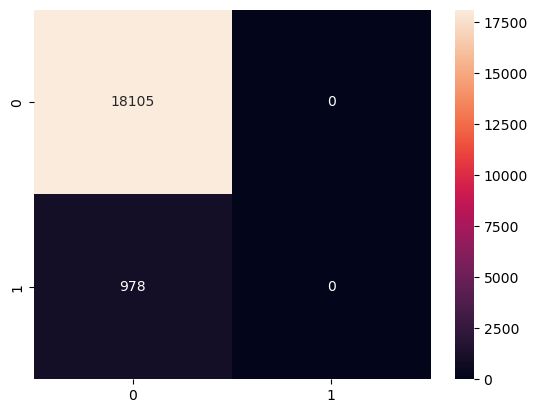

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')

plt.show()

In [63]:
TP = 18105
FN = 0
FP = 978
TN = 0

In [18]:
target_d = X_test['TARGET_D'].values

false_positives = np.logical_and(y_pred == 1, target_d == 0)
cost_false_positives = np.sum(target_d[false_positives])

false_negatives = np.logical_and(y_pred == 0, target_d > 0)
cost_false_negatives = np.sum(target_d[false_negatives])

total_error_cost = cost_false_positives + cost_false_negatives

print("Total cost of false positives:", cost_false_positives)
print("Total cost of false negatives:", cost_false_negatives)
print("Total cost of errors:", total_error_cost)


Total cost of false positives: 0.0
Total cost of false negatives: 15443.0
Total cost of errors: 15443.0


In [41]:
from sklearn.model_selection import cross_val_score
accuracies_x = cross_val_score(estimator = best_rf, X = X, y = y, cv = 10)
display(accuracies_x.mean())
display(accuracies_x.std())

0.9492411870436784

4.6423210620674824e-05

In [48]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.0


In [64]:
Recall = TP / (TP + FN)
Recall 

1.0

In [47]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)

print("Precision:", precision)

Precision: 0.0


C:\Users\celia\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
Precision = TP / (TP + FP)
Precision

0.9487501965099827